# IMT 511 PS 05: data programming

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data

read in the data file 'weatherHistory.csv.bz2'.  Understand it's
structure.  Consult the companion text file for a brief variable
descriptions.

inspect a few lines of the data and find the number of rows and columns

Hint: use pd.sample(), pd.head(), pd.tail()

In [30]:
weather = pd.read_csv('weatherHistory.csv.bz2')

## Select 2015 observations only

Select only observations for 2015.

Hint: 'time' is of a string data type (well, it is a Series of
string).  Use string methods to select 2015 data only.

Hint2: you have to use `.str` attribute to get a string out of series.

Hint3: don't just make a subset, make a copy of subset.

Find how many observations are there for 2015 only.

In [45]:
weather2015 = weather[weather.time.str.startswith('2015')].copy()
print(weather2015)
len(weather2015.shape)

                                time                   summary precip  \
78909  2015-04-01 00:00:00.000 +0200                  Overcast   rain   
78910  2015-04-01 01:00:00.000 +0200       Breezy and Overcast   rain   
78911  2015-04-01 02:00:00.000 +0200                  Overcast   rain   
78912  2015-04-01 03:00:00.000 +0200                  Overcast   rain   
78913  2015-04-01 04:00:00.000 +0200                  Overcast   rain   
78914  2015-04-01 05:00:00.000 +0200             Mostly Cloudy   rain   
78915  2015-04-01 06:00:00.000 +0200             Mostly Cloudy   rain   
78916  2015-04-01 07:00:00.000 +0200             Partly Cloudy   rain   
78917  2015-04-01 08:00:00.000 +0200             Mostly Cloudy   rain   
78918  2015-04-01 09:00:00.000 +0200             Mostly Cloudy   rain   
78919  2015-04-01 10:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78920  2015-04-01 11:00:00.000 +0200             Partly Cloudy   rain   
78921  2015-04-01 12:00:00.000 +0200  Breezy and Pa

2

## Create a new variable 'timestamp' which is variable 'time'
## converted to datetime type

Hint: use Pandas.to_datetime
(code given, adjust variable names)

In [64]:
weather2015['timestamp'] = pd.to_datetime(weather2015.time)
print(weather2015)

                                time                   summary precip  \
78909  2015-04-01 00:00:00.000 +0200                  Overcast   rain   
78910  2015-04-01 01:00:00.000 +0200       Breezy and Overcast   rain   
78911  2015-04-01 02:00:00.000 +0200                  Overcast   rain   
78912  2015-04-01 03:00:00.000 +0200                  Overcast   rain   
78913  2015-04-01 04:00:00.000 +0200                  Overcast   rain   
78914  2015-04-01 05:00:00.000 +0200             Mostly Cloudy   rain   
78915  2015-04-01 06:00:00.000 +0200             Mostly Cloudy   rain   
78916  2015-04-01 07:00:00.000 +0200             Partly Cloudy   rain   
78917  2015-04-01 08:00:00.000 +0200             Mostly Cloudy   rain   
78918  2015-04-01 09:00:00.000 +0200             Mostly Cloudy   rain   
78919  2015-04-01 10:00:00.000 +0200  Breezy and Partly Cloudy   rain   
78920  2015-04-01 11:00:00.000 +0200             Partly Cloudy   rain   
78921  2015-04-01 12:00:00.000 +0200  Breezy and Pa

## Sort data by date

This data is in an arbitrary order.  Ensure it is ordered by time

Hint: use Pandas.sort_values method

In [79]:
w15 = weather2015.sort_values('timestamp', ascending=True)
print(w15.timestamp)

81789    2015-01-01 00:00:00+01:00
81790    2015-01-01 01:00:00+01:00
81791    2015-01-01 02:00:00+01:00
81792    2015-01-01 03:00:00+01:00
81793    2015-01-01 04:00:00+01:00
81794    2015-01-01 05:00:00+01:00
81795    2015-01-01 06:00:00+01:00
81796    2015-01-01 07:00:00+01:00
81797    2015-01-01 08:00:00+01:00
81798    2015-01-01 09:00:00+01:00
81799    2015-01-01 10:00:00+01:00
81800    2015-01-01 11:00:00+01:00
81801    2015-01-01 12:00:00+01:00
81802    2015-01-01 13:00:00+01:00
81803    2015-01-01 14:00:00+01:00
81804    2015-01-01 15:00:00+01:00
81805    2015-01-01 16:00:00+01:00
81806    2015-01-01 17:00:00+01:00
81807    2015-01-01 18:00:00+01:00
81808    2015-01-01 19:00:00+01:00
81809    2015-01-01 20:00:00+01:00
81810    2015-01-01 21:00:00+01:00
81811    2015-01-01 22:00:00+01:00
81812    2015-01-01 23:00:00+01:00
82053    2015-01-02 00:00:00+01:00
82054    2015-01-02 01:00:00+01:00
82055    2015-01-02 02:00:00+01:00
82056    2015-01-02 03:00:00+01:00
82057    2015-01-02 

# Noon temperature only

Select a subset from your 2015 data that only contains data for noon
(12:00:00).

Hint: you can either find a string, corresponding to noon, in the
string variable 'time', or extract hour from the timestamp like this:
`w15.timestamp.apply(lambda x: x.hour)`
This example code creates a variable that is only the hour (0-23).

In [86]:
w15noon = w15[w15.time.str.contains(' 12:00:00', regex=False)].copy()
print(w15noon.shape)
print(w15noon.head(5))


(365, 13)
                                time summary precip      temp    appTemp  \
81801  2015-01-01 12:00:00.000 +0100   Clear   snow -4.900000 -10.588889   
82065  2015-01-02 12:00:00.000 +0100   Foggy   snow -2.172222  -6.227778   
82329  2015-01-03 12:00:00.000 +0100   Clear   rain  6.111111   2.922222   
82401  2015-01-04 12:00:00.000 +0100   Windy   rain  5.000000  -0.727778   
82425  2015-01-05 12:00:00.000 +0100   Clear   rain  2.777778  -2.577778   

       humidity     wind  bearing  visibility  cloudCover  pressumre  \
81801      0.68  15.7136    210.0      9.9820         0.0        0.0   
82065      0.96  11.2700    160.0      1.0465         0.0        0.0   
82329      0.60  16.5186    291.0      9.9820         0.0        0.0   
82401      0.65  40.5398    310.0      9.9820         0.0        0.0   
82425      0.57  27.4505    320.0      9.9820         0.0        0.0   

                                            dailySummary  \
81801  Partly cloudy starting overnight 

# make a plot

Make a plot that depicts the temperature through 2015
Add a descriptive title, label the axis.  Use a good font size. 
Use a non-default line color for the plot.

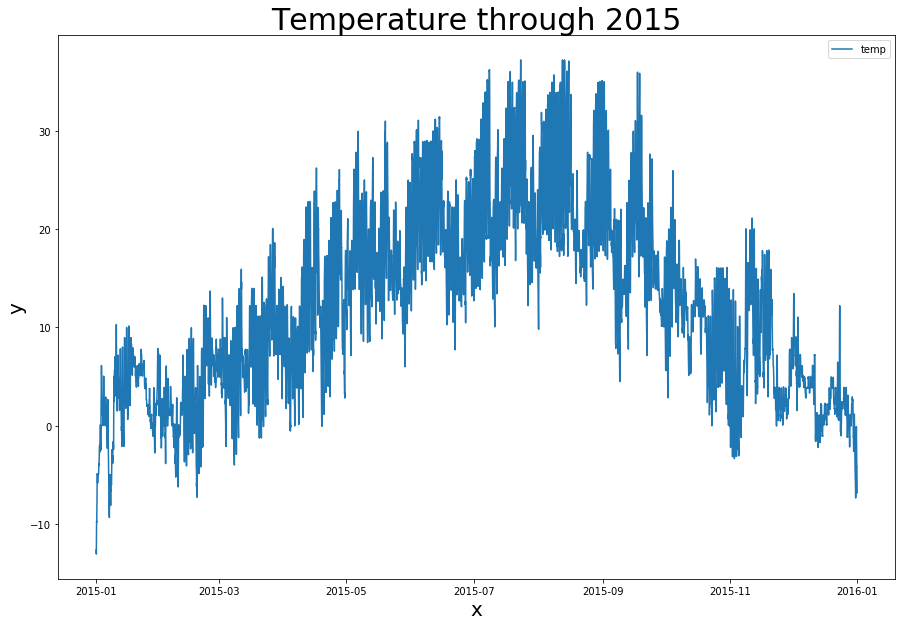

In [98]:
plt.figure(figsize=(15,10))
plt.plot(w15.timestamp, w15.temp)
plt.title('Temperature through 2015',{'fontsize':30})
plt.xlabel('x',{'fontsize':20})
plt.ylabel('y',{'fontsize':20})
plt.legend()